# Getting Google Trends Data Using Pytrends

Pytrends is a Python library that allows you to easily access Google Trends data. Google Trends provides insights into what people are searching for on Google. Pytrends simplifies the process of fetching and analyzing this data programmatically. In this tutorial, we will walk through the installation process and demonstrate how to use Pytrends to retrieve and visualize Google Trends data.

## 1. Installation

First, make sure you have Python installed on your system. You can download and install Python from [python.org](https://www.python.org/downloads/).

You can install Pytrends using pip, the Python package manager:

In [1]:
# !pip install pytrends
# ! pip install pytrends --upgrade

Once Pytrends is installed, you can import it into your Python script or interactive session:

In [2]:
from pytrends.request import TrendReq

## 2. Retrieving Google Trends Data

### Initializing Pytrends

To start retrieving Google Trends data, create a `TrendReq` object:

In [3]:
pytrends = TrendReq()

### Searching for Keywords

You can search for the popularity of specific keywords over time:

In [4]:
keywords = ["Python", "Data Science", "Machine Learning"]
pytrends.build_payload(keywords, timeframe='today 5-y')

### Retrieving Interest Over Time

You can retrieve the interest over time for the specified keywords:

In [6]:
interest_over_time_df = pytrends.interest_over_time()
print(interest_over_time_df.head())

            Python  Data Science  Machine Learning  isPartial
date                                                         
2019-03-03      59             3                 4      False
2019-03-10      59             3                 4      False
2019-03-17      62             3                 4      False
2019-03-24      62             3                 4      False
2019-03-31      60             3                 4      False


### Retrieving Related Queries

You can also retrieve related queries for a specific keyword:

In [7]:
related_queries = pytrends.related_queries()
print(related_queries)

{'Python': {'top':                  query  value
0           for python    100
1          python list     88
2            python if     39
3       install python     39
4      python function     36
5               pandas     32
6        pandas python     32
7        online python     31
8       what is python     31
9         python array     28
10     download python     28
11        python print     27
12   python dictionary     24
13        python class     22
14          python set     20
15         python json     19
16          python api     18
17               numpy     18
18          python pip     17
19                 pip     17
20        monty python     17
21         python time     17
22     python compiler     15
23  python programming     15
24              github     15, 'rising':                          query  value
0                        colab   4100
1                 google colab   3700
2                       replit   1000
3                replit python   1000


## 3. Visualizing Trends Data

### Using Matplotlib for Visualization

You can visualize Google Trends data using popular plotting libraries like Matplotlib:

<Figure size 1000x500 with 0 Axes>

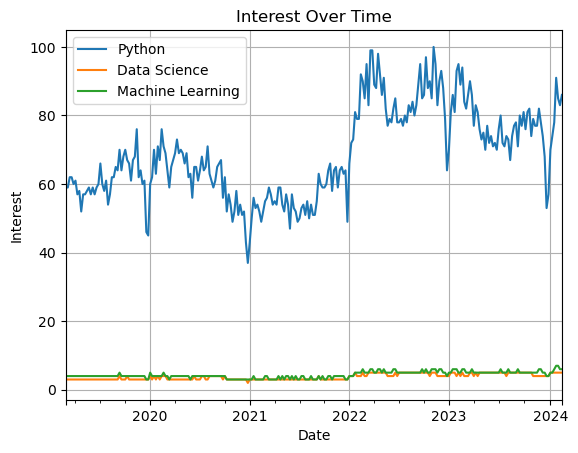

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
interest_over_time_df.plot()
plt.title('Interest Over Time')
plt.xlabel('Date')
plt.ylabel('Interest')
plt.grid(True)
plt.show()

## 4. Advanced Usage

### Geographic Trends

You can retrieve geographic trends for specific keywords:

In [9]:
pytrends.build_payload(keywords, geo='US')
geo_interest = pytrends.interest_by_region()
print(geo_interest)

                      Python  Data Science  Machine Learning
geoName                                                     
Alabama                   91             4                 5
Alaska                    92             4                 4
Arizona                   91             4                 5
Arkansas                  90             6                 4
California                91             4                 5
Colorado                  93             4                 3
Connecticut               90             5                 5
Delaware                  89             5                 6
District of Columbia      84             9                 7
Florida                   89             6                 5
Georgia                   88             6                 6
Hawaii                    89             6                 5
Idaho                     94             3                 3
Illinois                  89             6                 5
Indiana                 

In [10]:
# let's try for Germany
pytrends.build_payload(keywords, geo='DE')
geo_interest = pytrends.interest_by_region()
print(geo_interest)

                        Python  Data Science  Machine Learning
geoName                                                       
Baden-Württemberg           94             2                 4
Bavaria                     93             2                 5
Berlin                      92             3                 5
Brandenburg                 93             3                 4
Bremen                      94             2                 4
Hamburg                     93             3                 4
Hesse                       93             3                 4
Lower Saxony                94             2                 4
Mecklenburg-Vorpommern      95             2                 3
North Rhine-Westphalia      92             3                 5
Rhineland-Palatinate        94             3                 3
Saarland                    93             2                 5
Saxony                      95             2                 3
Saxony-Anhalt               92             3           

### Category Trends

You can retrieve trends for specific categories as well. Category refer to broad topical classifications like 'Music & Audio'. Here are all the categories: https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories

In [11]:
pytrends.build_payload(keywords, cat=0) # 0 is for all
category_interest = pytrends.interest_by_region()
print(category_interest)

                        Python  Data Science  Machine Learning
geoName                                                       
Baden-Württemberg           94             2                 4
Bavaria                     93             2                 5
Berlin                      92             3                 5
Brandenburg                 93             3                 4
Bremen                      94             2                 4
Hamburg                     93             3                 4
Hesse                       93             3                 4
Lower Saxony                94             2                 4
Mecklenburg-Vorpommern      95             2                 3
North Rhine-Westphalia      92             3                 5
Rhineland-Palatinate        94             3                 3
Saarland                    93             2                 5
Saxony                      95             2                 3
Saxony-Anhalt               92             3           

In [15]:
pytrends.build_payload(keywords, cat=231) # 231 is for 'Engineering & Technology'
category_interest = pytrends.interest_by_region()
print(category_interest)

                        Python  Data Science  Machine Learning
geoName                                                       
Baden-Württemberg           87             5                 8
Bavaria                     88             4                 8
Berlin                      82             6                12
Brandenburg                100             0                 0
Bremen                     100             0                 0
Hamburg                     91             9                 0
Hesse                       84             8                 8
Lower Saxony                89             3                 8
Mecklenburg-Vorpommern     100             0                 0
North Rhine-Westphalia      83             8                 9
Rhineland-Palatinate        82             9                 9
Saarland                   100             0                 0
Saxony                      89             5                 6
Saxony-Anhalt              100             0           

### Real-time Trends

You can retrieve real-time trends:

In [16]:
pytrends.build_payload(keywords, timeframe='now 1-H')
realtime_interest = pytrends.interest_over_time()
print(realtime_interest)

                     Python  Data Science  Machine Learning  isPartial
date                                                                  
2024-02-25 15:04:00      62             0                 0      False
2024-02-25 15:05:00      57             0                39      False
2024-02-25 15:06:00      42             0                 0      False
2024-02-25 15:07:00      73             0                 0      False
2024-02-25 15:08:00      71             0                 0      False
2024-02-25 15:09:00      67             0                 0      False
2024-02-25 15:10:00      66             0                 0      False
2024-02-25 15:11:00       0             0                 0      False
2024-02-25 15:12:00      42             0                 0      False
2024-02-25 15:13:00      37             0                 0      False
2024-02-25 15:14:00      63             0                 0      False
2024-02-25 15:15:00      66             0                 0      False
2024-0

### Spatial Plot of the Trends

In [17]:
import plotly.express as px

In [18]:
keywords = ['barbie', 'oppenheimer']
pytrends.build_payload(keywords, geo='US',
                      timeframe='2023-07-01 2023-08-01',
                      cat = 3 # 'Arts & Entertainment'
                      ) 
geo_interest = pytrends.interest_by_region()
print(geo_interest)

                      barbie  oppenheimer
geoName                                  
Alabama                   71           29
Alaska                    69           31
Arizona                   72           28
Arkansas                  71           29
California                69           31
Colorado                  69           31
Connecticut               69           31
Delaware                  69           31
District of Columbia      63           37
Florida                   72           28
Georgia                   73           27
Hawaii                    71           29
Idaho                     71           29
Illinois                  69           31
Indiana                   72           28
Iowa                      70           30
Kansas                    70           30
Kentucky                  72           28
Louisiana                 72           28
Maine                     66           34
Maryland                  73           27
Massachusetts             67      

In [20]:
geo_interest['diff'] = geo_interest['barbie'] - geo_interest['oppenheimer']
geo_interest = geo_interest.reset_index()
geo_interest

,geoName,barbie,oppenheimer,diff
0,Alabama,71,29,42
1,Alaska,69,31,38
2,Arizona,72,28,44
3,Arkansas,71,29,42
4,California,69,31,38
5,Colorado,69,31,38
6,Connecticut,69,31,38
7,Delaware,69,31,38
8,District of Columbia,63,37,26
9,Florida,72,28,44


In [21]:
# let's get the state abbreviations

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
geo_interest['state_code'] = [us_state_to_abbrev[i] for i in geo_interest['geoName']]

In [22]:
geo_interest

,geoName,barbie,oppenheimer,diff,state_code
0,Alabama,71,29,42,AL
1,Alaska,69,31,38,AK
2,Arizona,72,28,44,AZ
3,Arkansas,71,29,42,AR
4,California,69,31,38,CA
5,Colorado,69,31,38,CO
6,Connecticut,69,31,38,CT
7,Delaware,69,31,38,DE
8,District of Columbia,63,37,26,DC
9,Florida,72,28,44,FL


In [35]:
fig = px.choropleth(geo_interest,
                    locations='state_code',
                    color='diff',
                    color_continuous_scale='spectral_r',
                    hover_name='state_code',
                    locationmode='USA-states',
                    scope='usa')
fig.add_scattergeo(
    locations=geo_interest['state_code'],
    locationmode="USA-states", 
    text=geo_interest['state_code'],
    mode='text',
)
fig.update_layout(
    title_x = 0.5,
    title_y = 0.95,
    title_text='Preference for Barbie over Oppenheimer by US States',
    margin=dict(t=10, b=0, r=0, l=0),  # Set b (bottom) margin to 0
    autosize=True,
    # width=1300,
    # height=700,
)

fig.show()
fig.write_image('barbenheimer_interest.pdf')